In [1]:
# Импортирую необходимые для работы библиотеки.
import numpy as np
from scipy.stats import t
from scipy.stats import shapiro
from scipy.stats import ttest_1samp
from scipy.stats import ttest_rel
from scipy.stats import levene
from scipy.stats import ttest_ind
from scipy.stats import rankdata
from scipy.stats import mannwhitneyu
from scipy.stats import norm
from statsmodels.stats.proportion import proportions_ztest
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Задача 1
Из партии батареек с номинальным напряжением 12 В наугад выбрано семь штук. Согласно показаниям высокоточного вольтметра, фактически выдаваемое ими напряжение составило: 12,9; 11,6; 13,5; 13,9; 12,1; 11,9; 13,0 В соответственно. Можно ли считать, что среднее напряжение действительно равно 12 В?

#### Нулевая гипотеза Н0: Среднее напряжение партии батареек действительно равно 12 В.
Для данной задачи предварительно подходит одновыборочный t-test (ttest_1samp), так как необходимо сравнить срезнее выборки со средним генеральной совокупности (12 В).

In [2]:
# Сырые данные
seven_batteries = "12,9; 11,6; 13,5; 13,9; 12,1; 11,9; 13,0"

In [3]:
# Приведение данных к рабочему варианту
seven_batteries = np.array([float(x.replace(',', '.')) for x in seven_batteries.split(';')])
print(seven_batteries)

[12.9 11.6 13.5 13.9 12.1 11.9 13. ]


#### Решение вручную

In [4]:
# Среднее ГС
mu_batch_batteries = 12

Чтобы проверить, можно ли использовать одновыборочный t-test (ttest_1samp), проверяю нормальность выборки с помощью теста Шапиро-Уилка

In [5]:
# Тест Шапиро-Уилка
t_statistic_shapiro, p_value_shapiro = shapiro(seven_batteries)

In [6]:
# Вывод значений
print(f"t-статистика: {t_statistic_shapiro:.2f}") 
print(f"р-значение: {p_value_shapiro:.4f}")

t-статистика: 0.95
р-значение: 0.6946


In [7]:
if p_value_shapiro > 0.05:
    print("Выборка имеет нормальное распределение.")
else:
    print("Выборка не нормальна.")

Выборка имеет нормальное распределение.


Выборка оказалась нормальной, значит можно использовать одновыборочный t-test (ttest_1samp).

In [8]:
# Кол-во батареек в выборке
len_seven_batteries = len(seven_batteries)
print(f'Кол-во батареек в выборки: {len_seven_batteries}')

Кол-во батареек в выборки: 7


In [9]:
# Степень свободы
df_seven_batteries = len_seven_batteries - 1
print(f'Степень свободы выборки: {df_seven_batteries}')

Степень свободы выборки: 6


In [10]:
# Среднее выборки и стандартное отклонение выборки
mean_v = np.mean(seven_batteries)
std_v = np.std(seven_batteries, ddof=1)
print(f'Среднее выборки: {mean_v:.2f}')
print(f'Стандартное отклонение выборки: {std_v:.2f}')

Среднее выборки: 12.70
Стандартное отклонение выборки: 0.86


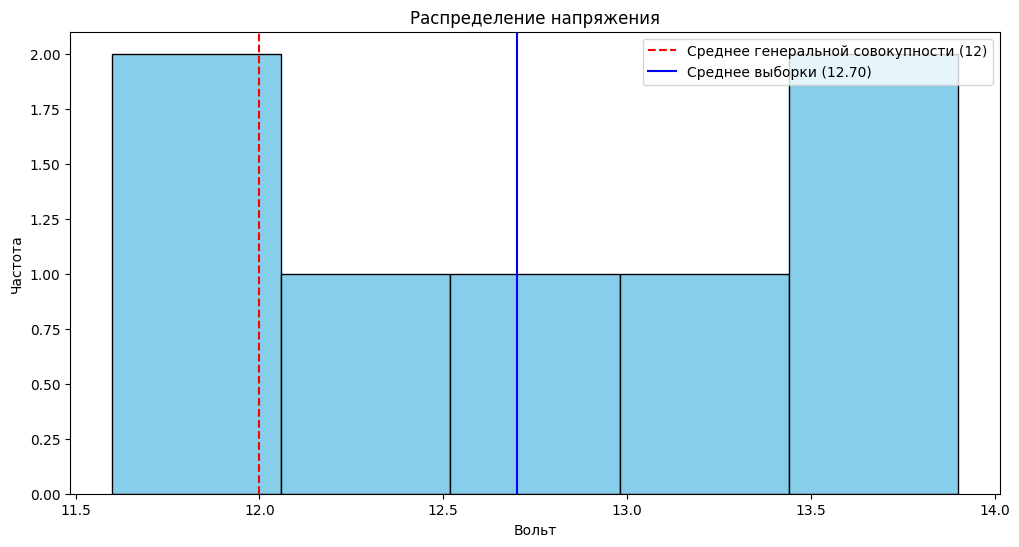

In [11]:
# Построение графика hist-плота
plt.figure(figsize=(12, 6)) # Размер графика
plt.hist(seven_batteries, bins=5, color='skyblue', edgecolor='black') # Настройка основы
# Настройка линий и этикетки
plt.axvline(x=mu_batch_batteries, color='red', linestyle='--', label='Среднее генеральной совокупности (12)') 
plt.axvline(x=mean_v, color='blue', linestyle='-', label=f'Среднее выборки ({mean_v:.2f})') # 
# Название графика и осей
plt.title('Распределение напряжения')
plt.xlabel('Вольт') 
plt.ylabel('Частота') 
# Легенда и показ графика
plt.legend() 
plt.show()

In [12]:
# Т-статистика
t_statistic_v = (mean_v - mu_batch_batteries) / (std_v / np.sqrt(len_seven_batteries))

In [13]:
# p-значение
batteries = t(df_seven_batteries)
p_value_v = 2 * (1 - batteries.cdf(abs(t_statistic_v)))

In [14]:
# Вывод значений
print(f"t-статистика: {t_statistic_v:.2f}") 
print(f"р-значение: {p_value_v:.4f}")

t-статистика: 2.16
р-значение: 0.0743


In [15]:
# Вывод по нулевой гипотезе
alpha = 0.05
if p_value_v < alpha:
    print(f"""Значение p-value ({p_value_v:.4f}) ниже заданного уровня значимости ({alpha}), 
    \rзначит мы отвергаем нулевую гипотезу о том,
    \rчто среднее напряжение партии батареек действительно равно 12 В,
    \rв пользу альтернативной гипотезы о том, что среднее напряжение не равно 12 В.""")
else:
    print(f"""Значение p-value ({p_value_v:.4f}) выше заданного уровня значимости ({alpha}),
    \rзначит у нас нет достаточных оснований для отвержения нулевой гипотезы
    \rо том, что среднее напряжение партии батареек действительно равно 12 В.""")

Значение p-value (0.0743) выше заданного уровня значимости (0.05),
значит у нас нет достаточных оснований для отвержения нулевой гипотезы
о том, что среднее напряжение партии батареек действительно равно 12 В.


#### Решение с помощью встроенной функции ttest_1samp

In [16]:
t_statistic_v, p_value_v = ttest_1samp(seven_batteries, mu_batch_batteries) 
print(f"t-статистика: {t_statistic_v:.2f}") 
print(f"р-значение: {p_value_v:.4f}")

t-статистика: 2.16
р-значение: 0.0743


### Задача 2
Есть два различных метода определения процентного содержания жира в мясе. Доля жира для 10 образцов мяса была определена каждым из двух методов. Позволяют ли полученные результаты сделать вывод о том, что один метод даёт в среднем более высокие показания, чем другой?

Образец	1	2	3	4	5	6	7	8	9	10

Метод I	23,1	23,2	26,5	26,6	27,1	48,3	40,5	25,0	38,4	23,5

Метод II	22,7	23,6	27,1	27,4	27,4	46,8	40,4	24,9	38,1	23,8

#### Нулевая гипотеза Н0: Средние значения долей жира, определённые двумя методами, равны.
Для данной задачи предварительно подходит парный t-test (ttest_rel), так как необходимо сравнить средние 2-х методов для одних и тех же образцов мяса, т.е. значения зависимы.

In [17]:
# Сырые данные
method_I = "23,1	23,2	26,5	26,6	27,1	48,3	40,5	25,0	38,4	23,5"
method_II = "22,7	23,6	27,1	27,4	27,4	46,8	40,4	24,9	38,1	23,8"

In [18]:
# Приведение данных к рабочему варианту
method_I = np.array([float(x.replace(',', '.')) for x in method_I.split('	')])
method_II = np.array([float(x.replace(',', '.')) for x in method_II.split('	')])
print(method_I)
print(method_II)

[23.1 23.2 26.5 26.6 27.1 48.3 40.5 25.  38.4 23.5]
[22.7 23.6 27.1 27.4 27.4 46.8 40.4 24.9 38.1 23.8]


#### Решение вручную

Чтобы проверить, можно ли использовать парный t-test (ttest_rel), проверяю нормальность двух выборок с помощью теста Шапиро-Уилка

In [19]:
# Создание списка со значениями разности 2-х выборок
difference_methods = list(map(lambda mI, mII: mI - mII, method_I, method_II))

In [20]:
# Тест Шапиро-Уилка
t_statistic_shapiro, p_value_shapiro = shapiro(difference_methods)

In [21]:
# Вывод значений
print(f"t-статистика: {t_statistic_shapiro:.2f}") 
print(f"р-значение: {p_value_shapiro:.4f}")

t-статистика: 0.90
р-значение: 0.2183


In [22]:
if p_value_shapiro > 0.05:
    print("Разность выборок имеет нормальное распределение.")
else:
    print("Разность выборок не нормальна.")

Разность выборок имеет нормальное распределение.


In [23]:
# Кол-во значений в выборке
len_difference_methods = len(difference_methods)
print(f'Кол-во значений в выборке: {len_difference_methods}')

Кол-во значений в выборке: 10


In [24]:
# Степень свободы
df_difference_methods = len_difference_methods - 1
print(f'Степень свободы выборки: {df_difference_methods}')

Степень свободы выборки: 9


In [25]:
# Из list в array
difference_methods = np.array(difference_methods)

In [26]:
# Среднее и стандартное отклонение выборки
mean_difference_methods = difference_methods.mean()
std_difference_methods = difference_methods.std(ddof=1)
print(f'Среднее в выборке: {mean_difference_methods:.2f}')
print(f'Стандартное отклонение выборки: {std_difference_methods:.2f}')

Среднее в выборке: 0.00
Стандартное отклонение выборки: 0.65


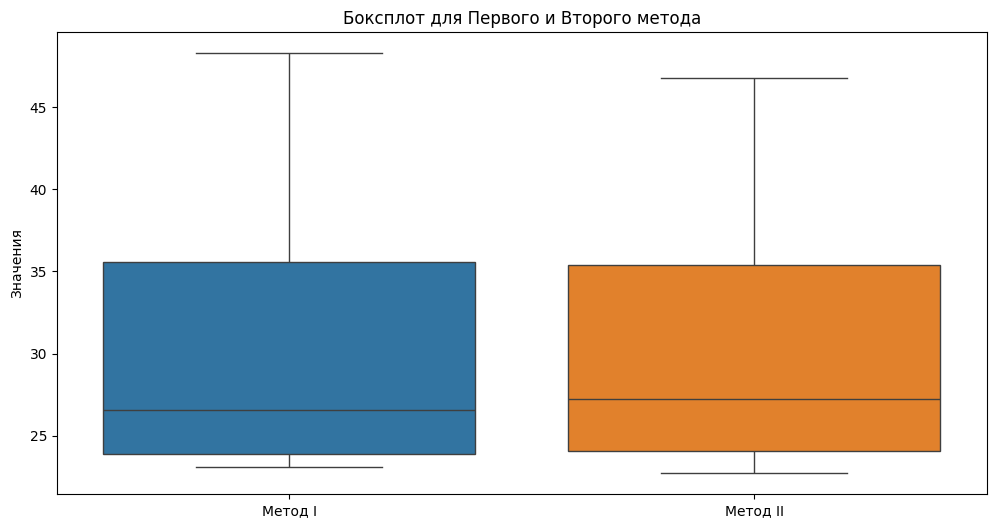

In [27]:
# Построение boxplot графика
plt.figure(figsize=(12, 6)) # Размер графика
sns.boxplot(data=[method_I, method_II]) # Настройка основы
# Названия графика и осей
plt.xticks([0, 1], ['Метод I', 'Метод II'])
plt.title("Боксплот для Первого и Второго метода")
plt.ylabel("Значения")
# Показ графика
plt.show()

In [28]:
# Т-статистика
t_statistic_difference_methods = mean_difference_methods / (std_difference_methods / np.sqrt(len_difference_methods))

In [29]:
# p-значение
p_value_difference_methods = 2 * (1 - t.cdf(abs(t_statistic_difference_methods), df_difference_methods))

In [30]:
# Вывод значений
print(f"t-статистика: {t_statistic_difference_methods:.2f}")
print(f"p-значение: {p_value_difference_methods:.4f}")

t-статистика: 0.00
p-значение: 1.0000


In [31]:
# Вывод по нулевой гипотезе
alpha = 0.05
if p_value_difference_methods < alpha:
    print(f"""Значение p-value ({p_value_difference_methods:.4f}) ниже заданного уровня значимости ({alpha}), 
    \rзначит мы отвергаем нулевую гипотезу об отсутствии статистически значимой разницы
    \r между методами определения процентного содержания жира в мясе,
    \rв пользу альтернативной гипотезы о наличии разницы.""")
else:
    print(f"""Значение p-value ({p_value_difference_methods:.4f}) выше заданного уровня значимости ({alpha}),
    \rзначит у нас нет достаточных оснований для отвержения нулевой гипотезы
    \rоб отсутствии статистически значимой разницы между методами определения процентного содержания жира в мясе.""")

Значение p-value (1.0000) выше заданного уровня значимости (0.05),
значит у нас нет достаточных оснований для отвержения нулевой гипотезы
об отсутствии статистически значимой разницы между методами определения процентного содержания жира в мясе.


#### Решение с помощью встроенной функции ttest_rel

In [32]:
t_statistic_difference_methods, p_value_difference_methods = ttest_rel(method_I, method_II)
print(f"t-статистика: {t_statistic_difference_methods:.2f}") 
print(f"р-значение: {p_value_difference_methods:.4f}")

t-статистика: 0.00
р-значение: 1.0000


### Задача 3
Для проверки гипотезы о том, что жители городов имеют в среднем более высокое систолическое артериальное давление, чем жители сельской местности, было проведено обследование 10 горожан и 9 жителей села примерно одного возраста. Получены следующие данные об уровне давления для горожан: 132, 111, 119, 138, 200, 131, 138, 170, 159, 140; для селян: 115, 190, 127, 155, 148, 121, 116, 121, 197. Можно ли считать верной выдвинутую гипотезу на уровне значимости 0,05?

#### Нулевая гипотеза Н0: Среднее систолическое давление у жителей городов и жителей сельской местности одинаково.
Для данной задачи предварительно подходит двухвыборочный t-test (ttest_ind), так как необходимо сравнить средние 2-х независимых обследований.

In [33]:
# Данные уже в рабочем варианте
townspeople = np.array([132, 111, 119, 138, 200, 131, 138, 170, 159, 140])
villagers = np.array([115, 190, 127, 155, 148, 121, 116, 121, 197])

#### Решение вручную

Чтобы проверить, можно ли использовать двухвыборочный t-test (ttest_ind), проверяю нормальность двух выборок с помощью теста Шапиро-Уилка

In [34]:
# Тест Шапиро-Уилка
t_statistic_shapiro_townspeople, p_value_shapiro_townspeople = shapiro(townspeople)
t_statistic_shapiro_villagers, p_value_shapiro_villagers = shapiro(villagers)

In [35]:
# Вывод значений
print(f"t-статистика городских жителей: {t_statistic_shapiro_townspeople:.2f}") 
print(f"р-значение городских жителей: {p_value_shapiro_townspeople:.4f}")
print(f"t-статистика жителей сельской местности: {t_statistic_shapiro_villagers:.2f}") 
print(f"р-значение жителей сельской местности: {p_value_shapiro_villagers:.4f}")

t-статистика городских жителей: 0.91
р-значение городских жителей: 0.2814
t-статистика жителей сельской местности: 0.83
р-значение жителей сельской местности: 0.0431


In [36]:
if p_value_shapiro_townspeople > 0.05 and p_value_shapiro_villagers > 0.05:
    print("Обе выборки нормальны. Дальше можно проверить равенство дисперсий с помощью теста Левена.")
else:
    print("Выборки/Одна из выборок не нормальны. Проверять равенство дисперсий нет смысла.")

Выборки/Одна из выборок не нормальны. Проверять равенство дисперсий нет смысла.


Использую тест Манна-Уитни (mannwhitneyu)

In [37]:
# Кол-во значений в выборке
len_townspeople = len(townspeople)
len_villagers = len(villagers)
print(f'Кол-во значений в выборке городских жителей: {len_townspeople}')
print(f'Кол-во значений в выборке жителей сельской местности: {len_villagers}')

Кол-во значений в выборке городских жителей: 10
Кол-во значений в выборке жителей сельской местности: 9


In [38]:
# Рассчитываю ранги значений
ranks_townspeople = rankdata(townspeople)
ranks_villagers = rankdata(villagers)
print(f'Ранги в выборке городских жителей: {ranks_townspeople}')
print(f'Ранги в выборке жителей сельской местности: {ranks_villagers}')

Ранги в выборке городских жителей: [ 4.   1.   2.   5.5 10.   3.   5.5  9.   8.   7. ]
Ранги в выборке жителей сельской местности: [1.  8.  5.  7.  6.  3.5 2.  3.5 9. ]


In [39]:
# Суммы рангов
sum_ranks_townspeople = np.sum(ranks_townspeople)
sum_ranks_villagers  = np.sum(ranks_villagers)
print(f'Суммы рангов в выборке городских жителей: {sum_ranks_townspeople}')
print(f'Суммы рангов в выборке жителей сельской местности: {sum_ranks_villagers}')

Суммы рангов в выборке городских жителей: 55.0
Суммы рангов в выборке жителей сельской местности: 45.0


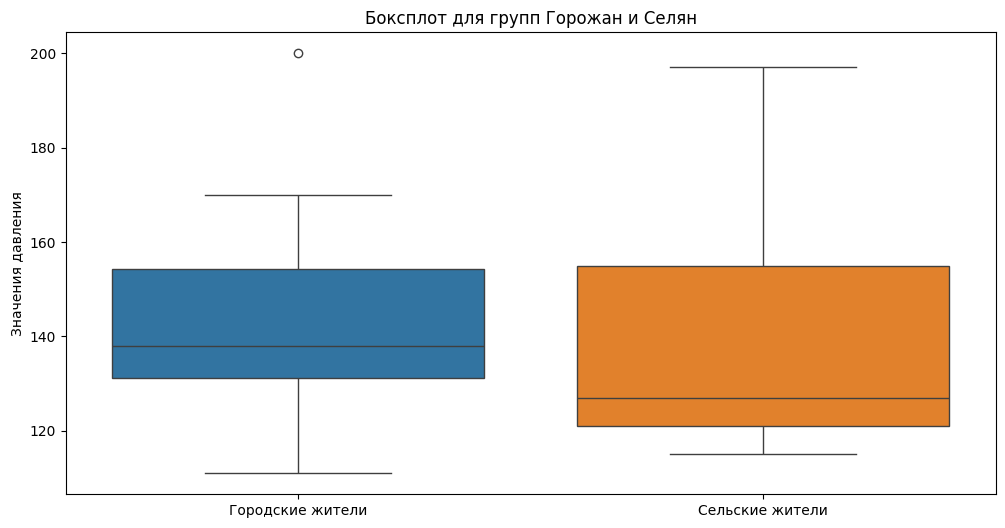

In [40]:
# Построение boxplot графика
plt.figure(figsize=(12, 6)) # Размер графика
sns.boxplot(data=[townspeople, villagers]) # Настройка основы
# Названия графика и осей
plt.xticks([0, 1], ['Городские жители', 'Сельские жители'])
plt.title("Боксплот для групп Горожан и Селян")
plt.ylabel("Значения давления")
# Показ графика
plt.show()

In [41]:
# Рассчёт U-статистики
U_statistic_pressure = sum_ranks_townspeople  + sum_ranks_villagers - (len_townspeople * (len_townspeople)) / 2
print(f"U-статистика: {U_statistic_pressure:.2f}")

U-статистика: 50.00


In [42]:
# Критическое значение из таблицы критических значений Манна-Уитни
critical_value = 20

In [43]:
# Вывод по нулевой гипотезе
if U_statistic_pressure < critical_value:
    print(f"""Значение U-статистики ({U_statistic_pressure:.4f}) ниже заданного уровня значимости ({alpha}), 
    \rзначит мы отвергаем нулевую гипотезу об отсутствии статистически значимой разницы
    \rмежду значением систолического артериального давления 
    \rу жителей городов и жителей сельской местности,
    \rв пользу альтернативной гипотезы о наличии разницы.""")
else:
    print(f"""Значение U-статистики ({U_statistic_pressure:.4f}) выше заданного уровня значимости ({alpha}),
    \rзначит у нас нет достаточных оснований для отвержения нулевой гипотезы
    \rоб отсутствии статистически значимой разницы между значением 
    \rсистолического артериального давления у жителей городов и жителей сельской местности.""")

Значение U-статистики (50.0000) выше заданного уровня значимости (0.05),
значит у нас нет достаточных оснований для отвержения нулевой гипотезы
об отсутствии статистически значимой разницы между значением 
систолического артериального давления у жителей городов и жителей сельской местности.


#### Решение с помощью встроенных библиотек

In [44]:
# Использую тест mannwhitneyu с alternative='greater', т.к. кол-во значений в первой выборке больше
t_statistic_pressure, p_value_pressure = mannwhitneyu(townspeople, villagers, alternative='greater')
print(f"t-статистика: {t_statistic_pressure:.2f}") 
print(f"р-значение: {p_value_pressure:.4f}")

t-статистика: 50.00
р-значение: 0.3565


### Задача 4
Известно, что 52% новорождённых детей — мальчики, а 48% — девочки. В случайной выборке из 5 000 человек в возрасте от 30 до 60 лет мужчин оказалось 2 500. Можно ли на уровне значимости 0,05 считать, основываясь на этих данных, что смертность среди мужчин и женщин одинакова?

#### Нулевая гипотеза Н0: Процент мужчин в выборке среди людей в возрасте 30–60 лет, равен процентному соотношению при рождении (52%).
Для данной задачи подходит z-test для двух пропорций (proportions_ztest), так как необходимо сравнить наблюдаемые доли мужчин в выборке и теоретической пропорции мужчин среди новорождённых.

In [45]:
sample_size_people = 5000 # Число людей в выборке
count_men_sample = 2500 # Число мужчин в выборке
population_proportion = 0.52 # Процент мальчиков при рождении
percentage_men_sample = 2500 / 5000 # Соотношение мужчин в выборке
alpha = 0.05 # Уровень значимости

#### Решение вручную

In [46]:
# Z-статистика
z_statistic_mortality = (percentage_men_sample - population_proportion) / np.sqrt((population_proportion * (1 - population_proportion)) / sample_size_people)

In [47]:
# p-значение
p_value_mortality = 2 * (1 - norm.cdf(abs(z_statistic_mortality)))

In [48]:
# Вывод значений
print(f"z-статистика: {z_statistic_mortality:.2f}")
print(f"p-value: {p_value_mortality:.4f}")

z-статистика: -2.83
p-value: 0.0046


In [49]:
# Вывод по нулевой гипотезе
alpha = 0.05
if p_value_mortality < alpha:
    print(f"""Значение p-value ({p_value_mortality:.4f}) ниже заданного уровня значимости ({alpha}), 
    \rзначит мы отвергаем нулевую гипотезу о том,
    \rчто процент мужчин в возрасте от 30 до 60 лет 
    \rравен процентному соотношению при рождении (52%).\n 
    \rЭто указывает на статистически значимую разницу, 
    \rкоторая может свидетельствовать о различной смертности среди мужчин и женщин.""")
else:
    print(f"""Значение p-value ({p_value_mortality:.4f}) выше заданного уровня значимости ({alpha}), 
    \rзначит у нас нет достаточных оснований для отвержения нулевой гипотезы 
    \rо том, что процент мужчин в возрасте от 30 до 60 лет 
    \rсоответствует процентному соотношению при рождении (52%).\n
    \rРазница, которая может свидетельствовать о различной смертности среди мужчин и женщинн 
    \rне является статистически значимой.""")

Значение p-value (0.0046) ниже заданного уровня значимости (0.05), 
значит мы отвергаем нулевую гипотезу о том,
что процент мужчин в возрасте от 30 до 60 лет 
равен процентному соотношению при рождении (52%).
 
Это указывает на статистически значимую разницу, 
которая может свидетельствовать о различной смертности среди мужчин и женщин.


#### Решение с помощью встроенных библиотек

In [50]:
# Использую alternative='two-sided' чтобы был двухсторонний тест
z_statistic_mortality, p_value_mortality = proportions_ztest(count=count_men_sample, nobs=sample_size_people, value=population_proportion, alternative='two-sided')
print(f"z-статистика: {z_statistic_mortality:.2f}")
print(f"p-value: {p_value_mortality:.4f}")

z-статистика: -2.83
p-value: 0.0047


In [51]:
# Расчёт для красивого графика
z_crit = norm.ppf(1 - alpha / 2)  # Критическое значение
z_values = np.linspace(-4, 4, 1000)  # Диапазон z-значений
z_pdf = norm.pdf(z_values) # Плотность вероятности

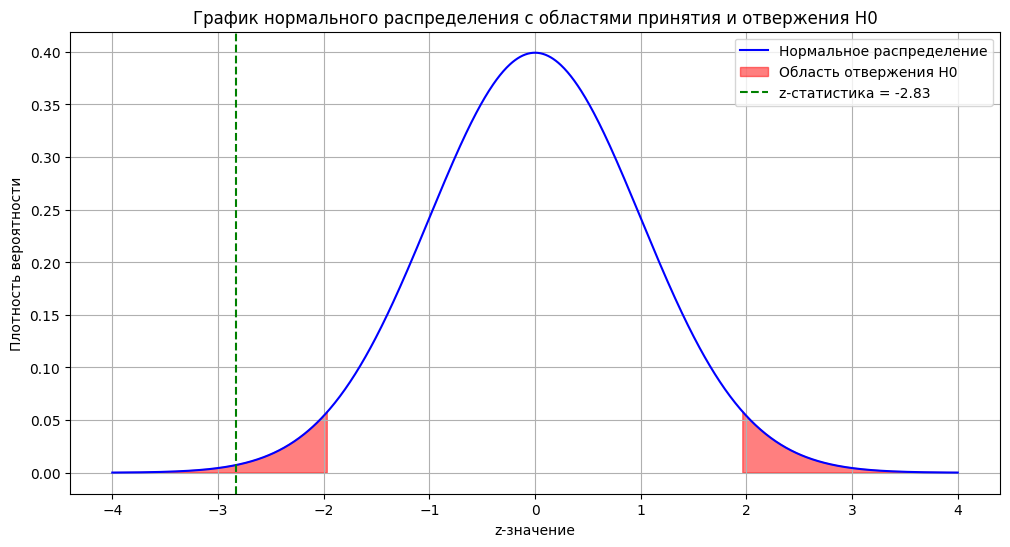

In [52]:
# Построение графика
plt.figure(figsize=(12, 6)) #  Размер графика
# Настройка основы
plt.plot(z_values, z_pdf, label="Нормальное распределение", color="blue")
# Настройка области критических значений
plt.fill_between(z_values, 0, z_pdf, 
                 where=(z_values <= -z_crit) | (z_values >= z_crit), 
                 color="red", alpha=0.5, label="Область отвержения H0")
# Настройка линии - вычисленной z-статистики
plt.axvline(z_statistic_mortality, color="green", linestyle="--", label=f"z-статистика = {z_statistic_mortality:.2f}")
# Названия графика и осей
plt.title("График нормального распределения с областями принятия и отвержения H0")
plt.xlabel("z-значение")
plt.ylabel("Плотность вероятности")
# Легенда, сетка и показ графика
plt.legend()
plt.grid(True)
plt.show()

### Задача 5
В первом эксперименте для сравнения двух средних X1=17, X2=16 применялся t-критерий Стьюдента, и эти различия оказались значимы (p = 0,001).

Во втором исследовании, также при помощи t - критерия, сравнивались два средних X1=17, X2=36, и эти различия не значимы при p = 0,8. В чем может быть причина таких результатов, при условии, что нулевая и альтернативная гипотезы в обоих случаях одинаковы?

#### Ответ:
- В первом эксперименте, несмотря на кажущуюся малую разницу двух средних, низкий уровень p-значения (p = 0,001).
- Во втором эксперименте, несмотря на кажущуюся значительную разницу двух средних, высокий уровень p-значения (p = 0,8).

Может существовать несколько причин таких резутьтатов:
1) Отсутствие независимости наблюдений в выборке.
2) - В первом эксперименте, хорошая нормальность распределения (она важена в t-тесте, при малом размере выборке (называют различные значения: от >30 до >100))
   - Во втором эксперименте, отсутствие нормальности распределения.
3) - В первом эксперименте, результат мог быть вызван большой выборкой, у которой была бы большая статистическая мощность, которая могла принять малые различия за значимые.
   - Во втором эксперименте, результат мог быть вызван малой выборкой, у которой была бы малая статистическая мощность, которая не смогла обнаружить большую разницу.
4) - В первом эксперименте, сравниваемые группы могли иметь одинаковые размеры или не сильно отличающиеся, в следствии этого увеличилась точность теста.
   - Во втором эксперименте, сравниваемые группы могли быть сильно неравномерными, в следствии этого статистическая мощность теста снизилась.
5) - В первом эксперименте, могла, хотя с очень малой вероятностью (p = 0,001), произойти ошибка I рода: отвергли нулевую гипотезу (о равенстве двух средних), хотя она была верна.
   - Во втором эксперименте, могла, хотя с малой вероятностью (p = 0,8), произойти ошибка II рода: приняли нулевую гипотезу (о равенстве двух средних), хотя она была не верна.
6) - В первом эксперименте, могла быть небольшая вариативность данных (стандартное отклонение/дисперсия), из-за этого тест отреагировал даже на небольшую разницу между средними.
   - Во втором эксперименте, могла быть большая вариативность данных (стандартное отклонение/дисперсия), из-за этого тест не отреагировал даже на большую разницу между средними.
7) Конкуренты взломали наши компьютеры и теперь они считают не правильно